In [3]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from joblib import dump
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Import Dataset
df = pd.read_csv('F:/Works/Application of ML/Dataset/AQI_Dataset/city_hour.csv', low_memory=False)
df.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN


In [5]:
# Drop columns from DataFrame
df.drop(columns=[ 'NO','NH3', 'Benzene','Toluene', 'Xylene', 'AQI', 'AQI_Bucket', 'NOx' ], inplace=True)
df.head()

,City,Datetime,PM2.5,PM10,NO2,CO,SO2,O3
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,40.01,1.00,122.07,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,27.75,0.02,85.90,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,19.32,0.08,52.83,NaN
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,16.45,0.30,39.53,153.58
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,14.90,0.12,32.63,NaN


In [6]:
# AVerage or Maximum Values Calculation
df["PM10_24hr_avg"] = df.groupby("City")["PM10"].rolling(window = 24, min_periods = 16).mean().values
df["PM2.5_24hr_avg"] = df.groupby("City")["PM2.5"].rolling(window = 24, min_periods = 16).mean().values
df["SO2_24hr_avg"] = df.groupby("City")["SO2"].rolling(window = 24, min_periods = 16).mean().values
df["NO2_24hr_avg"] = df.groupby("City")["NO2"].rolling(window = 24, min_periods = 16).mean().values
df["CO_8hr_max"] = df.groupby("City")["CO"].rolling(window = 8, min_periods = 1).max().values
df["O3_8hr_max"] = df.groupby("City")["O3"].rolling(window = 8, min_periods = 1).max().values
df.head()

,City,Datetime,PM2.5,PM10,NO2,CO,SO2,O3,PM10_24hr_avg,PM2.5_24hr_avg,SO2_24hr_avg,NO2_24hr_avg,CO_8hr_max,O3_8hr_max
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,40.01,1.00,122.07,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,27.75,0.02,85.90,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,19.32,0.08,52.83,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,16.45,0.30,39.53,153.58,NaN,NaN,NaN,NaN,1.0,153.58
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,14.90,0.12,32.63,NaN,NaN,NaN,NaN,NaN,1.0,153.58


In [7]:
# Drop rows with missing values
df.dropna(inplace=True)
df.head()

,City,Datetime,PM2.5,PM10,NO2,CO,SO2,O3,PM10_24hr_avg,PM2.5_24hr_avg,SO2_24hr_avg,NO2_24hr_avg,CO_8hr_max,O3_8hr_max
38302,Ahmedabad,2019-05-15 23:00:00,63.08,152.32,156.89,29.63,198.60,26.94,122.406957,37.546957,163.012500,85.120435,29.63,92.34
38305,Ahmedabad,2019-05-16 02:00:00,47.43,142.22,40.42,10.51,79.47,38.43,121.312174,35.988261,155.330625,81.772174,31.28,60.95
38306,Ahmedabad,2019-05-16 03:00:00,29.46,138.41,31.61,9.28,28.77,36.91,121.242174,34.822174,145.016250,81.122609,31.28,39.45
38307,Ahmedabad,2019-05-16 04:00:00,18.21,127.20,25.21,8.91,92.74,38.61,121.100870,33.788696,141.941176,80.215652,31.28,39.45
38308,Ahmedabad,2019-05-16 05:00:00,23.92,107.51,23.90,8.28,36.31,40.77,120.644783,33.593478,133.450588,79.007391,31.28,40.77


In [8]:
# PM2.5 Sub-Index calculation
def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

df["PM2.5_SubIndex"] = df["PM2.5_24hr_avg"].apply(lambda x: get_PM25_subindex(x))

In [9]:
# PM10 Sub-Index calculation
def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250)
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

df["PM10_SubIndex"] = df["PM10_24hr_avg"].apply(lambda x: get_PM10_subindex(x))

In [10]:
# SO2 Sub-Index calculation
def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

df["SO2_SubIndex"] = df["SO2_24hr_avg"].apply(lambda x: get_SO2_subindex(x))

In [11]:
# NO2 Sub-Index calculation
def get_NO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

df["NO2_SubIndex"] = df["NO2_24hr_avg"].apply(lambda x: get_NO2_subindex(x))

In [12]:
# CO Sub-Index calculation
def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

df["CO_SubIndex"] = df["CO_8hr_max"].apply(lambda x: get_CO_subindex(x))

In [13]:
# O3 Sub-Index calculation
def get_O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

df["O3_SubIndex"] = df["O3_8hr_max"].apply(lambda x: get_O3_subindex(x))

In [14]:
# AQI bucketing
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x <= 100:
        return "Satisfactory"
    elif x <= 200:
        return "Moderate"
    elif x <= 300:
        return "Poor"
    elif x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return np.NaN

df["Checks"] = (df["PM2.5_SubIndex"] > 0).astype(int) + \
                (df["PM10_SubIndex"] > 0).astype(int) + \
                (df["SO2_SubIndex"] > 0).astype(int) + \
                (df["NO2_SubIndex"] > 0).astype(int) + \
                (df["CO_SubIndex"] > 0).astype(int) + \
                (df["O3_SubIndex"] > 0).astype(int)

df["AQI_calculated"] = round(df[["PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex", "NO2_SubIndex",
                                 "CO_SubIndex", "O3_SubIndex"]].max(axis = 1))
df.loc[df["PM2.5_SubIndex"] + df["PM10_SubIndex"] <= 0, "AQI_calculated"] = np.NaN
df.loc[df.Checks < 3, "AQI_calculated"] = np.NaN

df["AQI_bucket_calculated"] = df["AQI_calculated"].apply(lambda x: get_AQI_bucket(x))
df.head()

,City,Datetime,PM2.5,PM10,NO2,CO,SO2,O3,PM10_24hr_avg,PM2.5_24hr_avg,...,O3_8hr_max,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NO2_SubIndex,CO_SubIndex,O3_SubIndex,Checks,AQI_calculated,AQI_bucket_calculated
38302,Ahmedabad,2019-05-15 23:00:00,63.08,152.32,156.89,29.63,198.60,26.94,122.406957,37.546957,...,92.34,62.578261,114.937971,127.670833,105.120435,374.294118,92.34,6,374.0,Very Poor
38305,Ahmedabad,2019-05-16 02:00:00,47.43,142.22,40.42,10.51,79.47,38.43,121.312174,35.988261,...,60.95,59.980435,114.208116,125.110208,101.772174,384.000000,60.95,6,384.0,Very Poor
38306,Ahmedabad,2019-05-16 03:00:00,29.46,138.41,31.61,9.28,28.77,36.91,121.242174,34.822174,...,39.45,58.036957,114.161449,121.672083,101.122609,384.000000,39.45,6,384.0,Very Poor
38307,Ahmedabad,2019-05-16 04:00:00,18.21,127.20,25.21,8.91,92.74,38.61,121.100870,33.788696,...,39.45,56.314493,114.067246,120.647059,100.215652,384.000000,39.45,6,384.0,Very Poor
38308,Ahmedabad,2019-05-16 05:00:00,23.92,107.51,23.90,8.28,36.31,40.77,120.644783,33.593478,...,40.77,55.989130,113.763188,117.816863,98.759239,384.000000,40.77,6,384.0,Very Poor


In [15]:
df[~df.AQI_calculated.isna()].head()

,City,Datetime,PM2.5,PM10,NO2,CO,SO2,O3,PM10_24hr_avg,PM2.5_24hr_avg,...,O3_8hr_max,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NO2_SubIndex,CO_SubIndex,O3_SubIndex,Checks,AQI_calculated,AQI_bucket_calculated
38302,Ahmedabad,2019-05-15 23:00:00,63.08,152.32,156.89,29.63,198.60,26.94,122.406957,37.546957,...,92.34,62.578261,114.937971,127.670833,105.120435,374.294118,92.34,6,374.0,Very Poor
38305,Ahmedabad,2019-05-16 02:00:00,47.43,142.22,40.42,10.51,79.47,38.43,121.312174,35.988261,...,60.95,59.980435,114.208116,125.110208,101.772174,384.000000,60.95,6,384.0,Very Poor
38306,Ahmedabad,2019-05-16 03:00:00,29.46,138.41,31.61,9.28,28.77,36.91,121.242174,34.822174,...,39.45,58.036957,114.161449,121.672083,101.122609,384.000000,39.45,6,384.0,Very Poor
38307,Ahmedabad,2019-05-16 04:00:00,18.21,127.20,25.21,8.91,92.74,38.61,121.100870,33.788696,...,39.45,56.314493,114.067246,120.647059,100.215652,384.000000,39.45,6,384.0,Very Poor
38308,Ahmedabad,2019-05-16 05:00:00,23.92,107.51,23.90,8.28,36.31,40.77,120.644783,33.593478,...,40.77,55.989130,113.763188,117.816863,98.759239,384.000000,40.77,6,384.0,Very Poor


In [16]:
# Check the Counts of Traget Columns
df[~df.AQI_calculated.isna()].AQI_bucket_calculated.value_counts()

AQI_bucket_calculated
Moderate        118920
Satisfactory    117235
Good             30423
Very Poor        28128
Poor             27487
Severe            7576
Name: count, dtype: int64

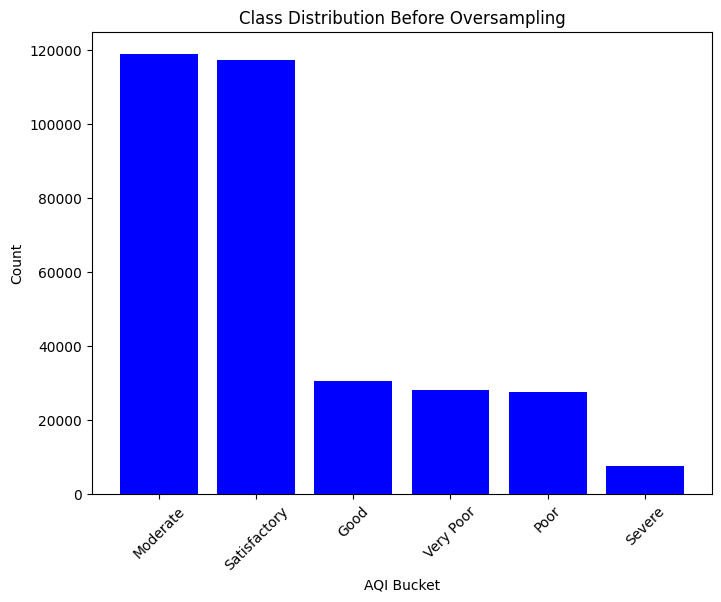

In [17]:
# Plot class distribution before and after oversampling
unique_values_count_before = df['AQI_bucket_calculated'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(unique_values_count_before.index, unique_values_count_before.values, color='blue')
plt.title('Class Distribution Before Oversampling')
plt.xlabel('AQI Bucket')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Save the plot as an image
plt.savefig('F:/Works/Application of ML/Final/ANN_data_levels.png')

In [18]:
#Null Check
df.isnull().sum()

City                     0
Datetime                 0
PM2.5                    0
PM10                     0
NO2                      0
CO                       0
SO2                      0
O3                       0
PM10_24hr_avg            0
PM2.5_24hr_avg           0
SO2_24hr_avg             0
NO2_24hr_avg             0
CO_8hr_max               0
O3_8hr_max               0
PM2.5_SubIndex           0
PM10_SubIndex            0
SO2_SubIndex             0
NO2_SubIndex             0
CO_SubIndex              0
O3_SubIndex              0
Checks                   0
AQI_calculated           0
AQI_bucket_calculated    0
dtype: int64

In [19]:
# Drop columns from DataFrame
df.drop(columns=[ 'City','Datetime', 'PM10_24hr_avg','PM2.5_24hr_avg', 'SO2_24hr_avg', 'NO2_24hr_avg', 'CO_8hr_max', 'O3_8hr_max', 'PM2.5',
                'PM10', 'SO2', 'NO2', 'CO', 'O3', 'Checks' , 'AQI_calculated' ], inplace=True)
df.head(10)

,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NO2_SubIndex,CO_SubIndex,O3_SubIndex,AQI_bucket_calculated
38302,62.578261,114.937971,127.670833,105.120435,374.294118,92.34,Very Poor
38305,59.980435,114.208116,125.110208,101.772174,384.000000,60.95,Very Poor
38306,58.036957,114.161449,121.672083,101.122609,384.000000,39.45,Very Poor
38307,56.314493,114.067246,120.647059,100.215652,384.000000,39.45,Very Poor
38308,55.989130,113.763188,117.816863,98.759239,384.000000,40.77,Very Poor
38309,55.747101,113.388116,115.156078,97.811413,384.000000,40.77,Very Poor
38310,54.657971,112.908986,112.473725,97.399457,384.000000,40.77,Very Poor
38311,53.835507,112.327826,109.730000,97.975000,273.714286,40.77,Poor
38312,55.148551,112.050145,106.442157,97.889130,273.714286,40.77,Poor
38313,54.910145,111.765797,105.607255,97.446739,281.428571,48.94,Poor


In [20]:
# Split the data into features (X) and target variable (y)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [21]:
# Manually specify the mappings for the target variable labels
class_mappings = {
    'Good': 0,
    'Satisfactory': 1,
    'Moderate': 2,
    'Poor': 3,
    'Very Poor': 4,
    'Severe': 5
}

# Map the target variable to its corresponding encoded labels using the manual mappings
y_encoded = [class_mappings[label] for label in y]

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the encoded target variable
y = label_encoder.fit_transform(y_encoded)

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Feature Scaling
scaler_ANN = StandardScaler()
X_train_scaled = scaler_ANN.fit_transform(X_train)
X_test_scaled = scaler_ANN.transform(X_test)

# Save the scaler for ANN
dump(scaler_ANN, 'F:/Works/Application of ML/Final/scaler_ANN.joblib')

['F:/Works/Application of ML/Final/scaler_ANN.joblib']

In [24]:
# Define the learning rate
learning_rate = 0.0001 

# Create an instance of the Adam optimizer with the desired learning rate
optimizer = Adam(learning_rate=learning_rate)

# Build the ANN model with dropout layers
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.1), 
    Dense(64, activation='relu'),
    Dropout(0.1),  
    Dense(32, activation='relu'),
    Dropout(0.1),  
    Dense(len(np.unique(y_train)), activation='softmax')  
])

# Compile the model with the custom optimizer
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_scaled, y_train, epochs=30, batch_size=128, validation_split=0.1, shuffle=True)

F:\Works\Application of ML\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1855/1855 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.6106 - loss: 1.1441 - val_accuracy: 0.8747 - val_loss: 0.3603
Epoch 2/30
1855/1855 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8324 - loss: 0.4112 - val_accuracy: 0.9055 - val_loss: 0.2505
Epoch 3/30
1855/1855 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8675 - loss: 0.3207 - val_accuracy: 0.9261 - val_loss: 0.2019
Epoch 4/30
1855/1855 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8859 - loss: 0.2748 - val_accuracy: 0.9358 - val_loss: 0.1740
Epoch 5/30
1855/1855 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8972 - loss: 0.2470 - val_accuracy: 0.9445 - val_loss: 0.1521
Epoch 6/30
1855/1855 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9052 - loss: 0.2275 - val_accuracy: 0.9512 - val_loss: 0.1373
Epoch 7/30
1855/1855 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9133 - loss: 0.2096 - val_accuracy: 0.9558 - val_loss: 0.1251
Epoch 8/30
1855/1855 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9189 - loss: 0.1961 -

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,292 (133.96 KB)

 Trainable params: 11,430 (44.65 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,862 (89.31 KB)

In [26]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')

2062/2062 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9805 - loss: 0.0554
Test Loss: 0.05648704618215561
Test Accuracy: 0.9792582988739014


In [27]:
# Extract the training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

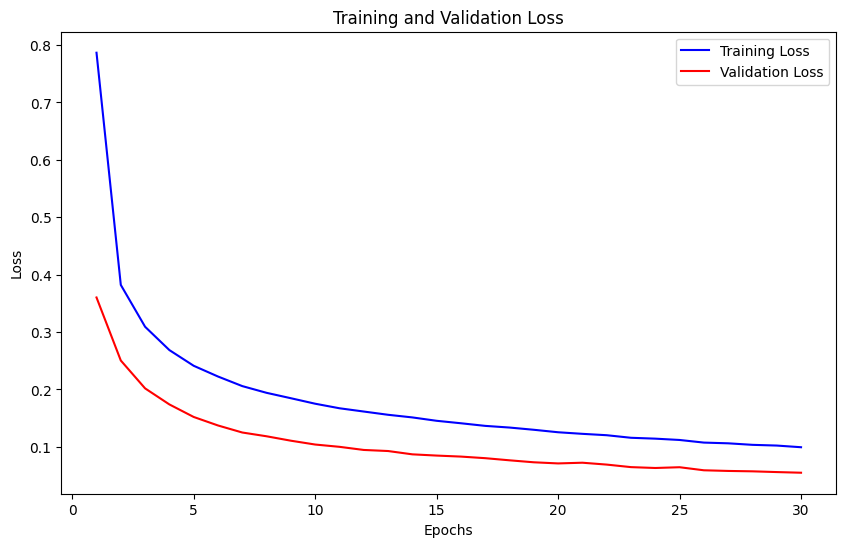

In [28]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Save the plot as an image
plt.savefig('F:/Works/Application of ML/Final/ANN_training_validation_loss.png')

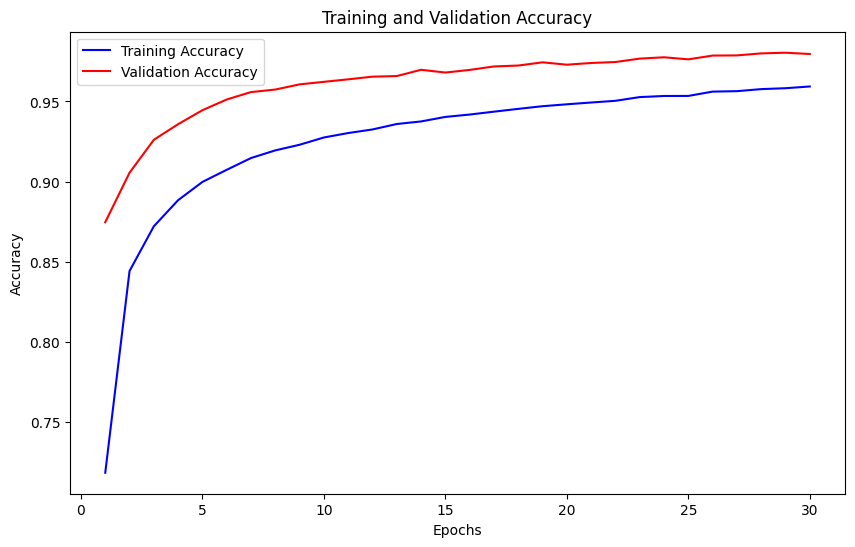

In [29]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Save the plot as an image
plt.savefig('F:/Works/Application of ML/Final/ANN_training_validation_accuracy.png')

In [30]:
# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred

2062/2062 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


array([[2.33304869e-17, 7.90681026e-21, 1.02921924e-11, 5.10359975e-03,
        9.94720459e-01, 1.75969923e-04],
       [2.83176247e-02, 9.71668303e-01, 1.40758239e-05, 3.45687265e-13,
        1.05230685e-11, 8.50323770e-11],
       [5.41030756e-18, 4.48762093e-22, 2.67647644e-12, 3.18556232e-03,
        9.96609330e-01, 2.05162869e-04],
       ...,
       [7.92485591e-11, 5.89166535e-04, 9.99352038e-01, 5.87443865e-05,
        1.59157590e-10, 6.09081614e-15],
       [9.85292375e-01, 1.47076063e-02, 1.02965867e-08, 3.34588814e-16,
        2.56211854e-13, 6.55241876e-12],
       [9.98918056e-01, 1.08191511e-03, 8.25184157e-11, 2.07969832e-18,
        4.73399091e-15, 1.19160216e-13]], dtype=float32)

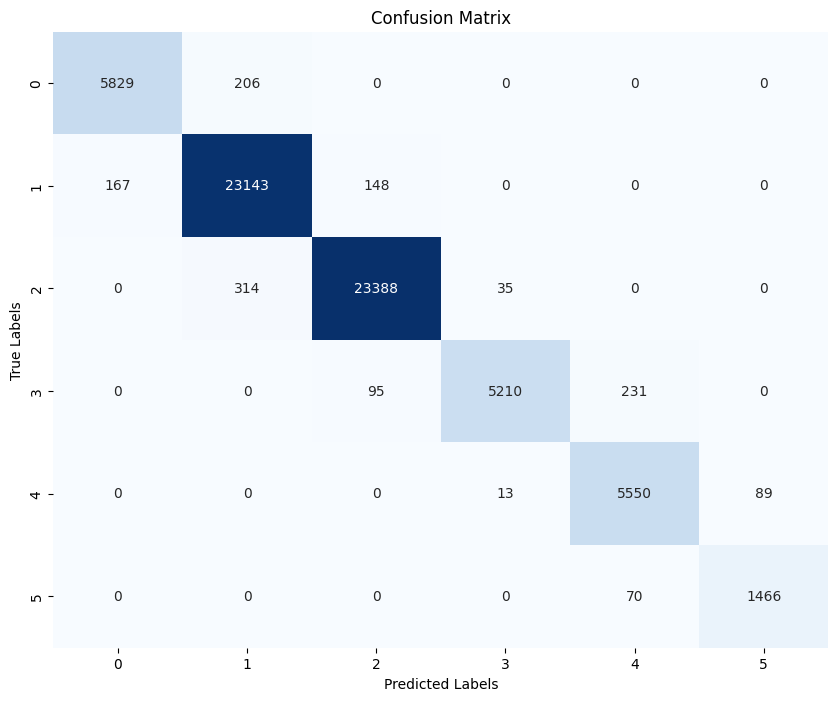

In [31]:
# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Save the plot as an image
plt.savefig('F:/Works/Application of ML/Final/ANN_confusion_matrix.png')

In [32]:
# Generate classification report
class_report = classification_report(y_test, y_pred_classes)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      6035
           1       0.98      0.99      0.98     23458
           2       0.99      0.99      0.99     23737
           3       0.99      0.94      0.97      5536
           4       0.95      0.98      0.96      5652
           5       0.94      0.95      0.95      1536

    accuracy                           0.98     65954
   macro avg       0.97      0.97      0.97     65954
weighted avg       0.98      0.98      0.98     65954



2062/2062 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


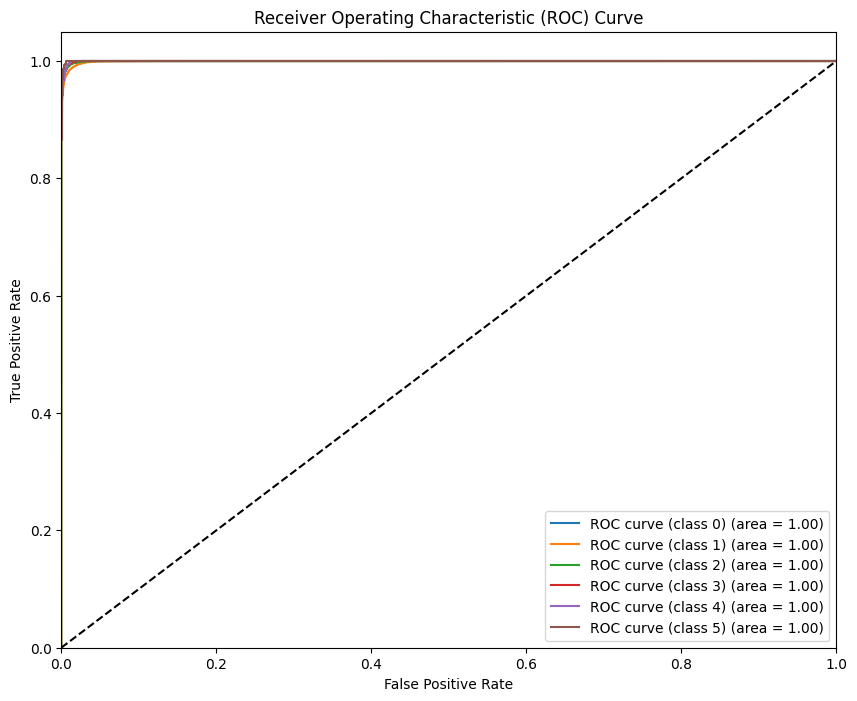

In [33]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Predict probabilities using the model
y_pred_prob = model.predict(X_test_scaled)

for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(10, 8))
for i in range(len(np.unique(y_test))):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {i}) (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Save the plot as an image
plt.savefig('F:/Works/Application of ML/Final/ANN_ROC_curve.png')

In [34]:
# Export DataFrame to a CSV file
df.to_csv('F:/Works/Application of ML/Final/exported_dataset_ANN.csv', index=False)

In [35]:
# Save the model to a file
model.save('F:/Works/Application of ML/Final/ANN_trained_model.h5')